In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [ ]:
print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))

(70000, 784)
(70000,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
data2 = np.array(mnist.data).reshape(70000, 28, 28)
data2 = data2[:7000]
data2

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

<Figure size 432x288 with 0 Axes>

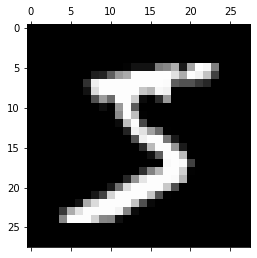

<Figure size 432x288 with 0 Axes>

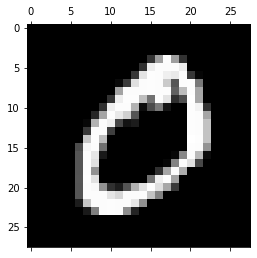

<Figure size 432x288 with 0 Axes>

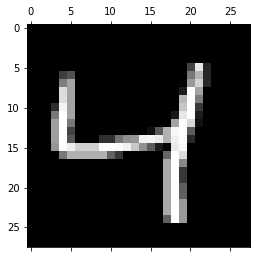

<Figure size 432x288 with 0 Axes>

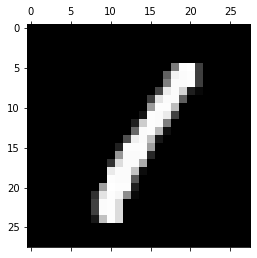

<Figure size 432x288 with 0 Axes>

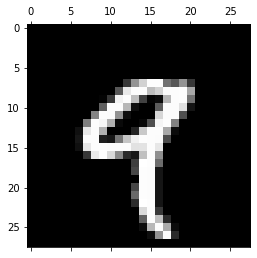

<Figure size 432x288 with 0 Axes>

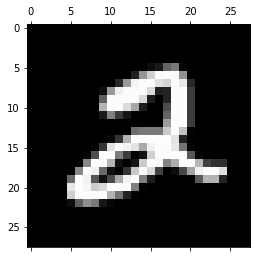

<Figure size 432x288 with 0 Axes>

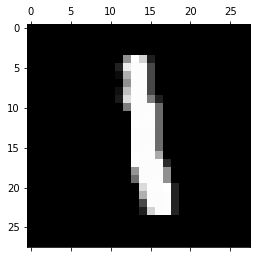

<Figure size 432x288 with 0 Axes>

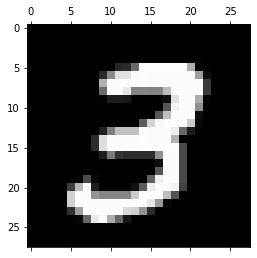

<Figure size 432x288 with 0 Axes>

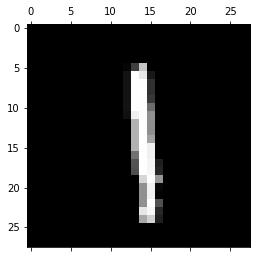

<Figure size 432x288 with 0 Axes>

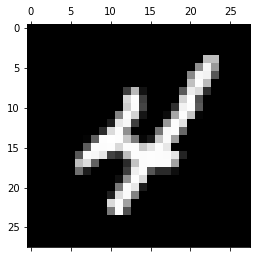

In [ ]:
for i in range(10):
  plt.gray()
  plt.matshow(data2[i])
  plt.show()

In [ ]:
X = mnist.data
X = X.iloc[:7000]
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = mnist.target
Y = Y.iloc[:7000]
Y

0       5
1       0
2       4
3       1
4       9
       ..
6995    4
6996    4
6997    5
6998    1
6999    9
Name: class, Length: 7000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
X.shape, Y.shape

((7000, 784), (7000,))

In [ ]:
X = X/255
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import svm
data = {}
list_kernel = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
for kern in list_kernel:
  print("Kernel :", kern)
  clf = svm.SVC(kernel=kern)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  acc = accuracy_score(y_test, y_pred)*100
  print("ACCURACY:",acc)
  data[kern] = acc
  print()

Kernel : linear
ACCURACY: 92.71428571428572

Kernel : poly
ACCURACY: 94.92857142857143

Kernel : rbf
ACCURACY: 96.57142857142857

Kernel : sigmoid
ACCURACY: 86.0

Kernel : precomputed


ValueError: ignored

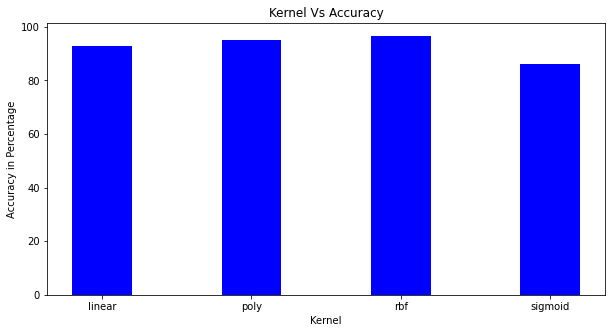

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

kernel = list(data.keys())
accu = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(kernel, accu, color ='blue',
        width = 0.4)
 
plt.xlabel("Kernel")
plt.ylabel("Accuracy in Percentage")
plt.title("Kernel Vs Accuracy")
plt.show()

In [ ]:
import random
final_dic = {}
for i in range(2,10):
  print("Degree :", i)
  clf = svm.SVC(kernel="poly", degree=i)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  accuracy_s = accuracy_score(y_test, y_pred)*100
  print("ACCURACY:",accuracy_s)
  final_dic[i] = accuracy_s
  print()

Degree : 2
ACCURACY: 96.0

Degree : 3
ACCURACY: 94.92857142857143

Degree : 4
ACCURACY: 92.71428571428572

Degree : 5
ACCURACY: 88.5

Degree : 6
ACCURACY: 84.21428571428572

Degree : 7
ACCURACY: 77.92857142857143

Degree : 8
ACCURACY: 72.5

Degree : 9
ACCURACY: 68.28571428571428



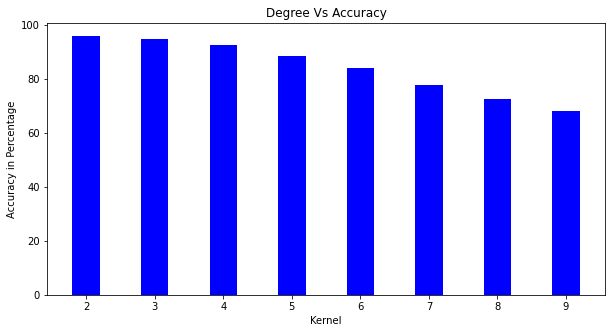

In [ ]:
degree = list(final_dic.keys())
accu = list(final_dic.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(degree, accu, color ='blue',
        width = 0.4)
 
plt.xlabel("Kernel")
plt.ylabel("Accuracy in Percentage")
plt.title("Degree Vs Accuracy")
plt.show()

In [ ]:
for i in range(0,10):
  final_dict = {}
  print("Random State :", i)
  clf = svm.SVC(kernel="poly", random_state=i)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  acc = accuracy_score(y_test, y_pred)*100
  print("ACCURACY:", acc)
  final_dict[i] = acc
  print()

Random State : 0
ACCURACY: 94.92857142857143

Random State : 1
ACCURACY: 94.92857142857143

Random State : 2
ACCURACY: 94.92857142857143

Random State : 3
ACCURACY: 94.92857142857143

Random State : 4
ACCURACY: 94.92857142857143

Random State : 5
ACCURACY: 94.92857142857143

Random State : 6
ACCURACY: 94.92857142857143

Random State : 7
ACCURACY: 94.92857142857143

Random State : 8
ACCURACY: 94.92857142857143

Random State : 9
ACCURACY: 94.92857142857143

